In [2]:
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import math
import seaborn as sns

# Interactions in Regression, Fixed Effects in Regression and Logistic Regression

In this project, we will be exploring the effects of interaction in Linear Regression and Logistic Regression. We will be going over how to interpret the coefficients of the interaction terms, and will also be looking at how they effect the model performance for both Logistic and Linear Regression.

## Interaction effects in Linear Regression. 
First, we will start by fitting a Linear Regression model on the "sales.csv" dataset, to predict the total_sales for a new area using given sales from three areas. We will also include the interaction terms between different areas in our model, to see if synergy between them affect the sales in new area. We will be comparing the full interactionless model, with a model with interactions with respect to their $R^{2}$ values, and the significance of  coefficinets of interaction terms. We will also be giving insights on how to interpret the coefficients of interaction terms in Linear Regression. 

Generally, for a linear regression model with interaction:

$$ Y = \beta_{0} + \beta_{1} * X_{1} + \beta_{2} * X_{2} + \beta_{3} * X_{1} * X_{2} $$

The coefficient of the interaction term $\beta_{3}$ is the increase in effectiveness of $X_{1}$ for a 1 unit change in $X_{2}$, and vice-versa. However, interpertrations might vary slightly based on types of variables interacting with each other(continuous, categorical, etc.)

## Interpreting Coefficients and Interaction Effects in Logistic Regression 
Next, we will be fitting a full Logistic Regression model on the "customer.csv" dataset, to predict whether the customer will purchase the product. We will also be fitting alternative Logistic regression models trimmed over different features, and comparing them to the full model with respect to their in-sample $R^{2}$"(pseudo). We will also be interpreting the coefficents of the best performing model. (For example, what effect does a positive or negative coefficient have on the model and so on)

In general in Logistic Regression,

$$ \frac{p}{1-p} = exp[ \beta_{0} + \beta_{1} * X_{1} + ...+\beta_{p} * X_{p}] $$

$ e^{\beta_{p}} $ is the odds multiplier for the unit increase in $ X_{p} $. In other words, 1 unit increase in  $ X_{p} $ will multiply the odds of variable of interest by $e^{\beta_{p}}$.

## Interaction Plots
Last but not the least, we will be creating interaction plots between different variables in the "customer.csv" dataset, and commenting on how we can assess if there is interaction between variables looking the interaction plots. 


# Interaction effects in Linear Regression.

First, let's explore the effects of interaction on the sales.csv dataset by fitting a Linear Regression model.

In [15]:
df = pd.read_csv("sales.csv")
df.head()

,Unnamed: 0,area1_sales,area2_sales,area3_sales,total_sales
0,1000,0.79,0.80,0.02,1.75
1,1001,0.83,0.08,0.18,1.75
2,1002,0.85,0.01,0.22,1.75
3,1003,1.25,0.00,0.03,1.75
4,1004,0.72,0.04,0.10,1.74


Let's start by running an interactionless model first.

In [16]:
## define x 
x = df[['area1_sales', 'area2_sales', 'area3_sales']]
## define y as total_sales
y = df['total_sales']

In [17]:
# build the linear regression model with x and y, then fit the regression model
reg=LinearRegression().fit(x, y)
print(f"R_squared:{reg.score(x, y)}") ## R_sqaured value
print("     ")
print(f"intercept:{reg.intercept_}")## intercept of the linear model
print("      ")
print(f"coefficients:{reg.coef_}")   ## coefficients of each variables

R_squared:0.70210761690304
     
intercept:0.26007635540274676
      
coefficients:[0.91480749 0.74890866 1.71362962]


Great, we can see the in sample $R^{2}$ value, as well as the intercept and coefficients of variables. However, since the LinearRegression model from the sklearn.linear_model does not provide a built in summary let's also run OLS linear regression from the statsmodels.api library

In [18]:
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2354.
Date:                Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                        23:21:42   Log-Likelihood:                 761.25
No. Observations:                3000   AIC:                            -1515.
Df Residuals:                    2996   BIC:                            -1490.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2601      0.008     30.743      

Nice, looking at the coefficient of variables, we can see that sales of all 3 areas affect the sales in a new opened area.

Perfect, Let's run the model with interaction, now.

In [19]:
## create all interaction terms
df['interaction1_2'] = df['area1_sales']*df['area2_sales']
df['interaction1_3'] = df['area1_sales']*df['area3_sales']
df['interaction2_3'] = df['area2_sales']*df['area3_sales']
## display the dataframe with all the interaction terms
df

,Unnamed: 0,area1_sales,area2_sales,area3_sales,total_sales,interaction1_2,interaction1_3,interaction2_3
0,1000,0.79,0.80,0.02,1.75,0.6320,0.0158,0.0160
1,1001,0.83,0.08,0.18,1.75,0.0664,0.1494,0.0144
2,1002,0.85,0.01,0.22,1.75,0.0085,0.1870,0.0022
3,1003,1.25,0.00,0.03,1.75,0.0000,0.0375,0.0000
4,1004,0.72,0.04,0.10,1.74,0.0288,0.0720,0.0040
...,...,...,...,...,...,...,...,...
2995,3995,0.20,0.00,0.07,0.49,0.0000,0.0140,0.0000
2996,3996,0.28,0.00,0.04,0.49,0.0000,0.0112,0.0000
2997,3997,0.00,0.49,0.00,0.49,0.0000,0.0000,0.0000
2998,3998,0.07,0.09,0.07,0.49,0.0063,0.0049,0.0063


In [20]:
## define x as all the interaction terms
x = df[['area1_sales', 'area2_sales', 'area3_sales', 'interaction1_2', 'interaction1_3', 'interaction2_3']]
## define y as total_sales
y = df['total_sales']

In [21]:
# build the linear regression model with x and y, then fit the regression model
reg=LinearRegression().fit(x, y)
print(f"R_squared:{reg.score(x, y)}") ## R_sqaured value
print("     ")
print(f"intercept:{reg.intercept_}")## intercept of the linear model
print("      ")
print(f"coefficients:{reg.coef_}")   ## coefficients of each variables

R_squared:0.7143088641667728
     
intercept:0.31318466529268485
      
coefficients:[0.77811731 0.63149627 1.22925513 0.41840793 1.21959518 1.2131021 ]


In [22]:
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1247.
Date:                Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                        23:21:55   Log-Likelihood:                 823.99
No. Observations:                3000   AIC:                            -1634.
Df Residuals:                    2993   BIC:                            -1592.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3132      0.010     32.

Linear regression model:

$$ Y = 0.3119028219659594 + 0.785215 * A_{1} + 0.651753 * A_{2} + 1.258301 * A_{3} + 0.199076* I_{12} + 1.088915 * I_{13} + 0.199401 *   I_{23} + 5.307762 $$


For our linear regression model, we included all the possible combinations of double interaction terms

All of the interaction terms are statistically significant, as we can see from the results of regression model. 

The R-squared value of the linear regression model with interaction is 0.714, which means 71.55% of the variation in the response variable can be explained by the predictor variables in this linear regression model. It is also increased by 1% compared to interactionless model.

We can clearly see from the results of our regression model that, if we were to open a new area for sales, the interaction of sales from other areas would have an effect on the sales of new area. We can observe that by looking at the coefficients of interaction terms, and how almost all of them are statistically significant.

Let's interpret one of the interaction terms now. 

The coefficient of the interaction term between area 1 and 2 is 0.4184. That means effect of area1 sales, on the new area goes up by 0.4184, for a unit increase in sales of area 2. 

We can also state this vice versa as in: 
Effectiveness of area2 sales, on the new area goes up by 0.4184, for a unit increase in sales of area 1. 

This interpretations are also applicable for every coefficient in this regression model. 

# Interpreting Coefficients and Interaction Effects in Logistic Regression 

Let's start by fitting a full Logistic Regression model on "customer.csv" dataset to predict Purchase

In [23]:
df_cust = pd.read_csv('customer.csv')
df_cust

formula = 'Purchased ~ Gender + Age + EstimatedSalary'

logistic_model = smf.logit(formula, df_cust)
logistic_result = logistic_model.fit()
print(logistic_result.summary())

Optimization terminated successfully.
         Current function value: 0.344804
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Mon, 01 May 2023   Pseudo R-squ.:                  0.4711
Time:                        23:30:28   Log-Likelihood:                -137.92
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 5.488e-53
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.7836      1.359     -9.405      0.000     -15.448     -10.120
Gender[T.Male]

In [28]:
logit_llf = logistic_result.llf

print("Log-Likelihood Model: " + str(logit_llf))
logit_llnull = logistic_result.llnull
print("Log-Likelihood Null: " + str(logit_llnull))

### Here, we manually calculate the R^2 value, using 1 - (Log_likelihood/Log_Likelihood_Null)
manual_r2= 1 - logit_llf/logit_llnull
print("Manual R^2: " + str(manual_r2))
print("Pseudo R^2: " + str(logistic_result.prsquared))



Log-Likelihood Model: -137.92161268796147
Log-Likelihood Null: -260.7864829137543
Manual R^2: 0.4711320496868925
Pseudo R^2: 0.4711320496868925


Results of our Logistic Regression model show that, both Age and Estimated salary variables are statistically significant meaning that it has an effect on the dependent variable and that effect can be applied to larger population. However, Gender Variable comes out to be statistically insignificant meaning we cannot apply the effects of this variable to a general population.

Additonally, our Pseudo R^2 and manually calculated R^2 values exactly match with each other.

Let's try running the same model using glm function.

In [29]:
formula = 'Purchased ~ Gender + Age + EstimatedSalary'
logistic_model2 = smf.glm(formula = formula, data=df_cust, family=sm.families.Binomial())
logistic_result2 = logistic_model2.fit()
print(logistic_result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      396
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -137.92
Date:                Mon, 01 May 2023   Deviance:                       275.84
Time:                        23:33:45   Pearson chi2:                     459.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4590
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.7836      1.359     

In [30]:
logit_d = logistic_result2.deviance

print("Deviance of Model: " + str(logit_d))
logit_dnull = logistic_result2.null_deviance
logit_dnull
print("Deviance of Null-Model: " + str(logit_dnull))

### Here, we manually calculate the R^2 value, using 1 - (Deviance/Null_Deviance)
manual_r2= 1 - logit_d/logit_dnull
print("Manual R^2: " + str(manual_r2))
print("McFadden’s pseudo-R^2: " + str(logistic_result2.pseudo_rsquared(kind = 'mcf')))
print("Cox&Snell's pseudo-R^2: " + str(logistic_result2.pseudo_rsquared(kind = 'cs')))


Deviance of Model: 275.8432253759229
Deviance of Null-Model: 521.5729657959091
Manual R^2: 0.4711320496548511
McFadden’s pseudo-R^2: 0.471132049654851
Cox&Snell's pseudo-R^2: 0.4589936978079343


Overall, We get to similar results by running the logistic regression model using glm() function. 
Gender dummy variable still comes out to be statistically insignificant meaning that its effect is not applicable for the whole population.
Our Pseudo r-squared values from the regression summary comes out to be slighly different than the manual calculation result, becuase the manual calculation uses McFadden's calculation method for R^2 while the default pseudo r^2 returned by regression summary uses Cox&Snell's calculation method. 

We can try using Cox&Snell's calculation method manually to see what it will yield.

In [31]:
logit_llf2 = logistic_result2.llf

print("Log-Likelihood Model: " + str(logit_llf2))
logit_llnull2 = logistic_result2.llnull
print("Log-Likelihood Null: " + str(logit_llnull2))

manual_r2_c= 1 - math.exp((logit_llnull2-logit_llf2)*(2/len(df_cust.index)))

print("Manual calculation for Cox&Snell's pseudo-R^2: " + str(manual_r2_c))

Log-Likelihood Model: -137.92161268796147
Log-Likelihood Null: -260.78648289795456
Manual calculation for Cox&Snell's pseudo-R^2: 0.4589936978079343


Manual Calculation yields the same result suggested by the regression summary.

From now on, I will use glm function by default to run the logistic regression models, for the sake of coherence and compare them using manually calculated McFaden's R^2. 

Now, Let's try trimmed models to see how they will perform. 
First, We will drop the gender dummy variable, since it came out to be insignificant, and run the regression model. 

In [26]:
formula = 'Purchased ~ Age + EstimatedSalary'
logistic_model3 = smf.glm(formula = formula, data=df_cust, family=sm.families.Binomial())
logistic_result3 = logistic_model3.fit()
print(logistic_result3.summary())

logit_d = logistic_result3.deviance

print("Deviance of Model: " + str(logit_d))
logit_dnull = logistic_result3.null_deviance
logit_dnull
print("Deviance of Null-Model: " + str(logit_dnull))

### Here, we manually calculate the R^2 value, using 1 - (Deviance/Null_Deviance)
manual_r2= 1 - logit_d/logit_dnull
print("Manual R^2: " + str(manual_r2))
print("McFadden’s pseudo-R^2: " + str(logistic_result3.pseudo_rsquared(kind = 'mcf')))
print("Cox&Snell's pseudo-R^2: " + str(logistic_result3.pseudo_rsquared(kind = 'cs')))


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      397
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -138.53
Date:                Mon, 01 May 2023   Deviance:                       277.05
Time:                        23:33:21   Pearson chi2:                     467.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4574
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.4340      1.300     

In [32]:
print("Pseudo R^2 from Trimmed Model: " + str(logistic_result3.pseudo_rsquared(kind = 'mcf')))
print("Pseudo R^2 from Full Model: " + str(logistic_result2.pseudo_rsquared(kind = 'mcf')))
print("Deviance of Trimmed Model: " + str(logistic_result3.deviance))
print("Deviance of Full Model: " + str(logistic_result2.deviance))

Pseudo R^2 from Trimmed Model: 0.4688156776517184
Pseudo R^2 from Full Model: 0.471132049654851
Deviance of Trimmed Model: 277.05138239148346
Deviance of Full Model: 275.8432253759229


This model so far has performed pretty well. First of all, although we dropped a variable from the model, which in theory should affect our R^2 value negatively, it did not sacrifice much from it. In other words, although we did drop a single variable from the model, the R^2 value went down by a very small fraction, which is just the result of dropping variables on R^2. This indicates that 2 variable model, is performing as good as the full model, even considering that we have one less variable here. Although the deviance of the model is slightly increased too, that increase is very minimal as well. 

We will try two more trimmed models with single variable to see how they perform.

In [33]:
formula = 'Purchased ~ Age'

logistic_model4 = smf.glm(formula = formula, data=df_cust, family=sm.families.Binomial())
logistic_result4 = logistic_model4.fit()
print(logistic_result4.summary())

logit_d = logistic_result4.deviance

print("Deviance of Model: " + str(logit_d))
logit_dnull = logistic_result4.null_deviance
logit_dnull
print("Deviance of Null-Model: " + str(logit_dnull))

### Here, we manually calculate the R^2 value, using 1 - (Deviance/Null_Deviance)
manual_r2= 1 - logit_d/logit_dnull
print("Manual R^2: " + str(manual_r2))
print("McFadden’s pseudo-R^2: " + str(logistic_result4.pseudo_rsquared(kind = 'mcf')))
print("Cox&Snell's pseudo-R^2: " + str(logistic_result4.pseudo_rsquared(kind = 'cs')))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      398
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -168.13
Date:                Mon, 01 May 2023   Deviance:                       336.26
Time:                        23:40:21   Pearson chi2:                     395.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3708
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.0441      0.784    -10.258      0.0

In [34]:
formula = 'Purchased ~ EstimatedSalary'

logistic_model5 = smf.glm(formula = formula, data=df_cust, family=sm.families.Binomial())
logistic_result5 = logistic_model5.fit()
print(logistic_result5.summary())

logit_d = logistic_result5.deviance

print("Deviance of Model: " + str(logit_d))
logit_dnull = logistic_result5.null_deviance
logit_dnull
print("Deviance of Null-Model: " + str(logit_dnull))

### Here, we manually calculate the R^2 value, using 1 - (Deviance/Null_Deviance)
manual_r2= 1 - logit_d/logit_dnull
print("Manual R^2: " + str(manual_r2))
print("McFadden’s pseudo-R^2: " + str(logistic_result5.pseudo_rsquared(kind = 'mcf')))
print("Cox&Snell's pseudo-R^2: " + str(logistic_result5.pseudo_rsquared(kind = 'cs')))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      398
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -233.86
Date:                Mon, 01 May 2023   Deviance:                       467.73
Time:                        23:40:28   Pearson chi2:                     426.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1259
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.3227      0.286     

Both of the single variable models, ended up performing not that well. First model sacrified its r^2 value by more than 10% while the second model's r^2 value ended up decreasing by more than 20%. In each of those models, Deviance went up by about 100 and 200 respectively, as well. Everything mentioned above, are indicators that dropping those 2 variables from the model, will affect its performance negatively. 

In contrast to what we saw with the first trimmed model, where both deviance and r^2 values were affected by dropping a variable very negligibly, this was not the case for our single variable trimmed models. 

We will choose to interpret the first trimmed model, with Age and Salary variables, since it is the simplest model that does not sacrifice its performance by much, compared to a full model.

We will interpret the first trimmed model, where we regressed Purchased on Age and Estimated Salary due to the reasons stated above.
Let's print the summary for the same model one more time. 

In [35]:
formula = 'Purchased ~ Age + EstimatedSalary'
logistic_model3 = smf.glm(formula = formula, data=df_cust, family=sm.families.Binomial())
logistic_result3 = logistic_model3.fit()
print(logistic_result3.summary())

logit_d = logistic_result3.deviance

print("Deviance of Model: " + str(logit_d))
logit_dnull = logistic_result3.null_deviance
logit_dnull
print("Deviance of Null-Model: " + str(logit_dnull))

### Here, we manually calculate the R^2 value, using 1 - (Deviance/Null_Deviance)
manual_r2= 1 - logit_d/logit_dnull
print("Manual R^2: " + str(manual_r2))
print("McFadden’s pseudo-R^2: " + str(logistic_result3.pseudo_rsquared(kind = 'mcf')))
print("Cox&Snell's pseudo-R^2: " + str(logistic_result3.pseudo_rsquared(kind = 'cs')))


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      397
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -138.53
Date:                Mon, 01 May 2023   Deviance:                       277.05
Time:                        23:41:21   Pearson chi2:                     467.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4574
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.4340      1.300     

Now, Let's interpret model's coefficients:

Age: As we can see from the results, every one year increase in age, will multiply the ods of purchase by exp(0.2335).
Interchangably, we can also say that one unit change in age, increases the log odds of purchasing by 0.2335. 

Estimated Salary: Similarly, every one dollar increase in salary, will multiply the ods of purchase by exp(3.59e-05).
Interchangably, we can also say that one unit change in Salary, increases the log odds of purchasing by 3.59e-05. 

In General, coefficients in logistic regression mean that, odds of the dependent variable will be multiplied by exp(coefficient).

When the coefficient is positive, that means the odds are going to be multiplied by a number that is bigger than 1, which means the odds of dependent variable will be increased.

In contrast, When the coefficient is negative, that means the odds are going to be multiplied by a number that is less than 1, which means the odds of dependent variable will be decreased.

As regards to the intercept, we can interpret it in terms of the probability of a customer purchasing(without any effects of Age and Salary) if we calculate the inverse logit using the following formula:

exp(Intercept)/(1+exp(intercept))

Which in our case:

In [ ]:
b0_int = math.exp(-12.4340)/(1+ math.exp(-12.4340))
b0_int

3.980894636440643e-06

We get a value of, 3.980894636440643e-06, which is the default probability of a customer purchasing without any effects of age and salary. In our case that is not a true discovery, because we cannot have a customer with age of 0 and salary of 0. However, if there would be a such customer, that would be the probability of that customer making a purchase.

In general, if the intercept of a Logistic Regression model has a negative sign, then the probability of having the outcome will be less than 0.5.
If the intercept has a positive sign, then the probability of having the outcome will be greater than 0.5.
If the intercept is equal to zero, then the probability of having the outcome will be exactly 0.5.

In [ ]:
### Calcuating Multipliers
b1_int = math.exp(0.2335)
b2_int = math.exp(3.59e-05)
print(b1_int)
print(b2_int)

1.2630128278909127
1.0000359006444126


Circling back to coefficients, every 1 year increase in age will multiply the odds of purchase by 1.2630128278909127.
Similarly, every 1 dollar increase in salary will multiply the odds of purchase by 1.0000359006444126.
Both of these increase the odds of purchase, since the coefficients were positive.

## Why Accuracy would not be a good metric to judge the model performance in our case?

For our case, it is not a good idea to consider Accuracy as a good metric to judge the model. 
Mainly because our dataset is unbalanced. Let's take a closer look at the dataset:

In [ ]:
print("Number of 1's: " + str(df_cust['Purchased'].value_counts()[1]))
print("Number of 0's: " + str(df_cust['Purchased'].value_counts()[0]))

Number of 1's: 143
Number of 0's: 257


As we can clearly see, number of 0 flags in our dataset is 257. That means even if our model predicts 0 values for every single one of customers by default, we will still get an Accuracy of more than 60%, which will be misleading.

Thus, it will be a good idea to take into consideration other metrics to judge the model, such as ReCall or Precision. Both of those metrics rely on measuring the ratio of true positives from all the positive values and from all the predicticted values respectively.

In a logistic regression model such as we have in our case, using Recall and Precision would be a better metric to judge the model, compared to Accuracy.

## Interaction Plots

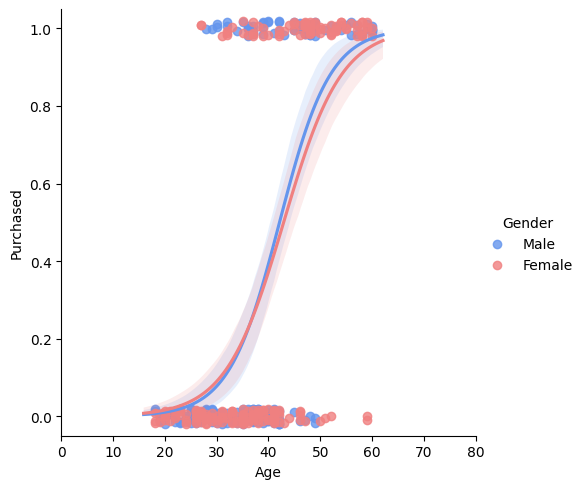

In [36]:
from statsmodels.graphics.factorplots import interaction_plot

pal = dict(Male="#6495ED", Female="#F08080")
g = sns.lmplot(x="Age", y="Purchased", hue="Gender", data=df_cust,
               palette=pal, y_jitter=.02, logistic=True, truncate=False)

g.set(xlim=(0, 80), ylim=(-.05, 1.05))

Y axis is the probability of purchase

From the result of this interaction plot, we can clearly see that Interaction of Age and Gender, definitely has an effect on purchase.
Firstly, we can clearly see that probability of purchasing increases as the age increases. 
Additionally, we can also see that Gender also has a changing effect on purchase as the age increases. 
